## Compute the streamfunction from the relative vorticity by solving the poisson equation:
\begin{equation}
\Delta{\psi}= (\frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2})\psi = -\xi_{rel}
\end{equation}

This laplacian inversion is only enable on a compact domain, whithout any island or coast.

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import dask.array as da
import xarray as xr

import crocosi.postp as pp
import crocosi.gridop as gop
from crocosi.plot import DefCmap

# import warnings
# warnings.filterwarnings('ignore')

In [2]:
from dask.distributed import Client, LocalCluster
#
#cluster = LocalCluster()
#cluster = LocalCluster(processes=False, n_workers=2, threads_per_worker=1)
#
from dask_jobqueue import PBSCluster
# ** processes and cores may be adjusted in order to have more memory or inversely more computational ressource
cluster = PBSCluster(processes=5, cores=5, walltime='04:00:00')
#cluster = PBSCluster(walltime='04:00:00')
#cluster = PBSCluster()
w = cluster.scale(jobs=2)
#
client = Client(cluster)
client

Client Scheduler: inproc://134.246.212.216/28655/1 Dashboard: http://134.246.212.216:8787/status,Cluster Workers: 2 Cores: 2 Memory: 34.36 GB


In [3]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
cmap = DefCmap()

### Load Data

In [4]:
%%time
#root_path = '/Users/slgentil/tmp/'
root_path = '/home/datawork-lops-osi/cmenesg/moz/'
run = 'moz_1024x1024x180_hmin30_r0p1_ts5_tb0_hc10_UP5_GLS_GEBCO2014_tides'

open_kwargs = {'drop_variables': ['time','nav_lon_u','nav_lat_u','nav_lon_v','nav_lat_v',
                                  'time_counter_bounds', 'time_instant', 'time_instant_bounds',
                                 ]}
r = pp.Run(root_path+run, outputs=['his'], 
           chunks={'his':{'time_counter': 1}}, 
           grid_regular=False, verbose=True, 
           open_kwargs=open_kwargs)
r['his'] = r['his'].reset_coords(['f'])
r['grid'] = r['grid'].reset_coords(['f'])
r['his'] = r['his'].rename({'time_counter':'time'})

# rechunk dataset
r['his'] = gop.ds_hor_chunk(r['his'])
r['grid'] = gop.ds_hor_chunk(r['grid'])

Analysing directory /Users/slgentil/tmp/moz_1024x1024x180_hmin30_r0p1_ts5_tb0_hc10_UP5_GLS_GEBCO2014_tides
Found 1 segments
Search for parameters in croco.in :
Parameters detected in output.mpi :
Opening datasets: grid / his
Grid size: (L ,M, N) = (1026, 1026, 180)
CPU times: user 17.1 s, sys: 4.3 s, total: 21.4 s
Wall time: 18.8 s


In [7]:
r['his']

<xarray.Dataset>
Dimensions:       (s_rho: 180, s_w: 181, time: 2, x_rho: 1026, x_u: 1025, y_rho: 1026, y_v: 1025)
Coordinates:
    nav_lat_rho   (y_rho, x_rho) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    nav_lon_rho   (y_rho, x_rho) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
  * s_rho         (s_rho) float32 -0.9972 -0.9917 ... -0.008333 -0.002778
  * s_w           (s_w) float32 -1.0 -0.9944 -0.9889 ... -0.01111 -0.005556 0.0
    nav_lon_u     (y_rho, x_u) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    nav_lat_u     (y_rho, x_u) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    nav_lon_v     (y_v, x_rho) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    nav_lat_v     (y_v, x_rho) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    nav_lon_psi   (y_v, x_u) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    nav_lat_psi   (y_v, x_u) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    time_counter  (time) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    z_r           (time, s_rho, y_rho, x_rho) float32 dask.array<chunksize=(1, 180, 372, 372), meta=np.ndarray>
    z_w           (time, s_w, y_rho, x_rho) float32 dask.array<chunksize=(1, 181, 372, 372), meta=np.ndarray>
    z_u           (time, s_rho, y_rho, x_u) float32 dask.array<chunksize=(1, 180, 372, 372), meta=np.ndarray>
    z_v           (time, s_rho, y_v, x_rho) float32 dask.array<chunksize=(1, 180, 372, 372), meta=np.ndarray>
    z_psi         (time, s_rho, y_v, x_u) float32 dask.array<chunksize=(1, 180, 372, 372), meta=np.ndarray>
Dimensions without coordinates: time, x_rho, x_u, y_rho, y_v
Data variables:
    hc            float32 ...
    theta_s       float32 ...
    theta_b       float32 ...
    Tcline        float32 ...
    Vtransform    float64 2.0
    h             (y_rho, x_rho) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    f             (y_rho, x_rho) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    pm            (y_rho, x_rho) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    pn            (y_rho, x_rho) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    angle         (y_rho, x_rho) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    mask_rho      (y_rho, x_rho) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    Cs_r          (s_rho) float32 dask.array<chunksize=(180,), meta=np.ndarray>
    sc_r          (s_rho) float32 dask.array<chunksize=(180,), meta=np.ndarray>
    Cs_w          (s_w) float32 dask.array<chunksize=(181,), meta=np.ndarray>
    sc_w          (s_w) float32 dask.array<chunksize=(181,), meta=np.ndarray>
    lon_rho       (y_rho, x_rho) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    lat_rho       (y_rho, x_rho) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    lon_u         (y_rho, x_u) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    lat_u         (y_rho, x_u) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    lon_v         (y_v, x_rho) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    lat_v         (y_v, x_rho) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    dx_r          (y_rho, x_rho) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    dy_r          (y_rho, x_rho) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    dx_u          (y_rho, x_u) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    dy_u          (y_rho, x_u) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    dx_v          (y_v, x_rho) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    dy_v          (y_v, x_rho) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    dx_psi        (y_v, x_u) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    dy_psi        (y_v, x_u) float32 dask.array<chunksize=(372, 372), meta=np.ndarray>
    dz_r          (time, s_w, y_rho, x_r

### Compute relative vorticity

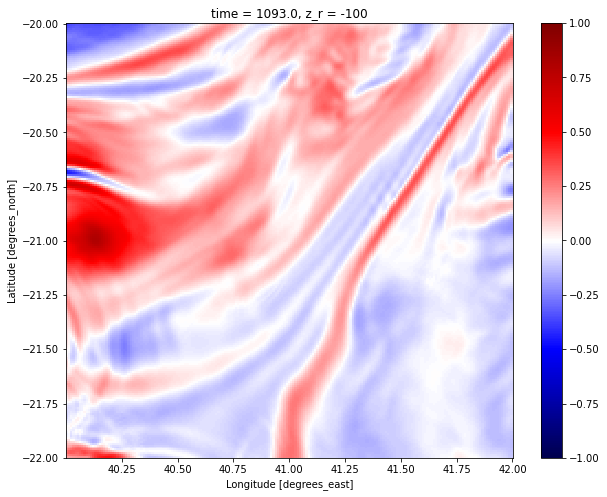

In [8]:
# Select a zone with no island and no coast
lon_min = 40
lon_max = 42
lat_min = -22
lat_max = -20

u = r['his'].u.isel(time=0)
v = r['his'].v.isel(time=0)
z_r  = r['his'].z_r.isel(time=0)
f = r['grid'].f

# compute the relative vorticity on the psi point
pv = r.get_relative_vorticity(u, v).squeeze().rename('pv')
# move pv on a rho point
pv = gop.x2rho(pv, r.xgrid).assign_coords(coords={"z_r":z_r})
pv = (pv / f)
# compute an horizontal slice at z=-100m
pv = gop.get_slices(r, pv, z_r, depth=-100)

# extract pm,pn and pv on the selected zone
pv = pv.where((lon_min < pv.nav_lon_rho) & (pv.nav_lon_rho < lon_max)
         & (lat_min < pv.nav_lat_rho) & (pv.nav_lat_rho < lat_max), drop=True)

pm = r['grid'].pm
pm = pm.where((lon_min < pm.nav_lon_rho) & (pm.nav_lon_rho < lon_max)
     & (lat_min < pm.nav_lat_rho) & (pm.nav_lat_rho < lat_max), drop=True)

pn = r['grid'].pn
pn = pn.where((lon_min < pn.nav_lon_rho) & (pn.nav_lon_rho < lon_max)
     & (lat_min < pn.nav_lat_rho) & (pn.nav_lat_rho < lat_max), drop=True)

# plot pv
pv.plot(vmin=-1,vmax=1,cmap='seismic',x='nav_lon_rho',y='nav_lat_rho')

In [10]:
chi = r.get_streamfunction(pm,pn,pv,verbo=True)

creating matrix A
creating matrix b
multilevel_solver
Number of Levels:     8
Operator Complexity:  2.193
Grid Complexity:      1.666
Coarse Solver:        'pinv2'
  level   unknowns     nonzeros
    0        44254       220428 [45.60%]
    1        22127       197461 [40.85%]
    2         5520        49090 [10.16%]
    3         1382        12266 [ 2.54%]
    4          340         3094 [ 0.64%]
    5           85          811 [ 0.17%]
    6           22          218 [ 0.05%]
    7            6           36 [ 0.01%]

residual:  1448.3663018477057


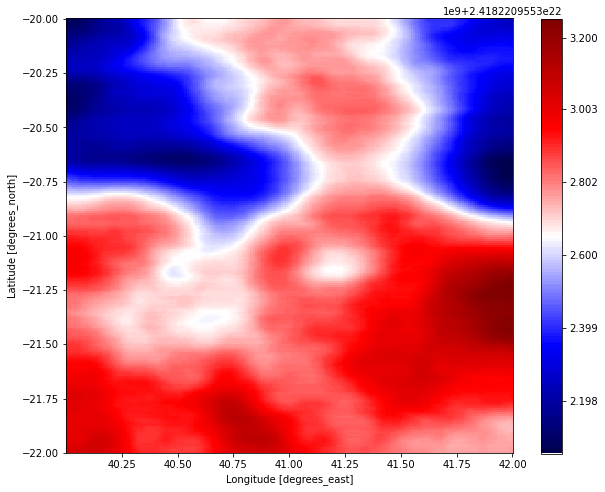

In [11]:
chi.plot(x='nav_lon_rho', y='nav_lat_rho', cmap='seismic')

In [ ]:
cluster.close()